# Sesión 09
> Por Christian Rubio Montiel (CRM)
Implementación por Josue Río Campos Becerra, Bruno Andrés Muciño Guerrero, Diana Laura Paredes Gómez, Yollotl Fernando Tamayo Hernández y CRM

En esta sesión regresamos a ver el problema de ordenación para resolverlo mediante el algoritmo Merge Sort. Se abordará el uso de datos en Julia: [Datos](https://www.dropbox.com/s/6y1igphbvnyobbb/Datos.ipynb?dl=0).

<a id='indice'></a>
### Índice
---
1. **[Divide y Vencerás](#DivideYVenceras)**
2. **[MERGE](#merge)**
3. **[MERGE SORT](#MergeSort)**
4. **[Implementación](#implementacion)**
5. **[Experimentación en el tiempo de ejecución](#experimentacion)**
6. **[Referencias](#referencias)**
---

<a id='DivideYVenceras'></a>
## 1. Divide y Vencerás

La técnica para diseñar algoritmos denominada **Divide y Vencerás** tiene una idea sencilla, esta es, reducir el problema inicial en dos más pequeños del mismo tipo. Por supuesto, esto nos generará una recursión.

En nuestro problema de ordenación, seguimos la estrategia en tres pasos:
1. Dividimos nuestro arreglo en dos, cada uno de tamaño $n/2$.
2. Cada parte la ordenamos de manera recursiva.
3. Ahora tenemos que mezclar dos arreglos ordenados para lograr ordenar nuestro arreglo inicial.

Empecemos con el tercer punto, es decir, dar una subrutina para mezclar dos arreglos ordenados previamente. Para ejemplificar este algoritmo, imaginé dos hileras de alumnos ordenados por estatura, una hilera de mujeres y una hilera de hombres. Ahora, tiene que generar una unifila ordenada. Para lograrlo, se fija en la primer alumna y en el primer alumno de sus respectivas hileras. Entre ellos dos, elige el que va primero en la unifila. Una de las dos hileras iniciales se vuelve más pequeña, así que repite el proceso para asignar el segundo en la unifila y así sucesivamente.

Regresar al **[Índice](#indice)**.

<a id='merge'></a>
## 2. MERGE

En este algoritmo, la entrada es un arreglo $A$ de $n$ números, y tres valores $p,q,r$ tal que $1\leq p\leq q<r\leq n$ donde asumimos que del índice $p$ al índice $q$ está ordenado (de menor a mayor) y del índice $q+1$ al índice $r$ también está ordenado (de menor a mayor). La salida será el arreglo $A$ tal que del índice $p$ al índice $r$ está ordenado (de menor a mayor).

*MERGE($A$,$p$,$q$,$r$)*
1. $n_1=q-p+1$
2. $n_2=r-q$
3. crear arreglos $L[1..n_1+1]$ y $R[1..n_2+1]$
4. **for** $i=1$ **to** $n_1$ **do**
5. $\hspace{0.6cm}L[i]=A[p+i-1]$
6. **for** $j=1$ **to** $n_2$ **do**
7. $\hspace{0.6cm}R[j]=A[q+j]$
8. $L[n_1+1]=\infty$
9. $R[n_2+1]=\infty$
10. $i=1$
11. $j=1$
12. **for** $k=p$ **to** $r$ **do**
13. $\hspace{0.6cm}$**if** $L[i]\leq R[j]$ **then**
14. $\hspace{1cm}A[k]=L[i]$
15. $\hspace{1cm}i=i+1$
16. $\hspace{0.6cm}$**else** $A[k]=R[j]$
15. $\hspace{1.5cm}j=j+1$

Antes de ver que el algoritmo es correcto, vale la pena analizar los índices, por ejemplo, la entrada $A$ de los indices $p$ a $q$ se asume que están ordenados, es decir, $A[p..q]$, cuya longitud se obtiene al restar $p-1$ a los índices para ver que inicia en $p-(p-1)=1$ y finaliza en $q-(p-1)=q-p+1$ por lo que se define a $n_1=q-p+1$. Similarmente, $n_2=r-q$ se obtiene de restar $q$ a los índices de $A[q+1..r]$. Luego, los arreglos $L$ y $R$ se crean con un lugar extra, donde se pone un centinela $\infty$, que lo único que quiere decir que si se compara con un número, siempre será mayor. Se puede dejar como ejercicio al alumno generar un centinela con el símbolo que desee.

De la línea 1 a la 11, es lo que se denomina *preparar el terreno*, todas las líneas son ejecutadas en tiempo constante, salvo donde aparecen los ciclos **for**, que cada uno lleva un tiempo de ejecución $\theta(n_1)$ y $\theta(n_2)$, respectivamente. En las línea 10 y 11 se reinician los índices contadores.

El inicio (caso base) a partir de la línea 12 es como sigue: Tomamos $p=q$ y $q+1=r$ ya que un solo elemento está ordenado. Así, $n_1=n_2=1$, en la línea 13 se escribe el menor en la posición $p$ y el íncide correspondiente avanza a $2$, es decir, si la línea 13 entró, $i$ toma el valor $2$, si no, $j=2$. En cualquier caso, en la siguiente iteración $k=p+1=r$ se comparará con el centinela por lo que se sobreescribe en $A[k]$ el siguiente valor quedando así ordenado de $p$ a $r$.

Tomamos la hipótesis sobre el ciclo **for** de la línea 12 y hacemos la siguiente iteración, funcionando exactamente como en el caso base. Y el algoritmo finaliza ya que en cada iteración avanza el índice correspondiente.

Claramente, se recorre tanto el arreglo $L$ como el arreglo $R$ por lo que el tiempo de ejeccución es $\theta(n_1+n_2)$, es decir, es lineal.

Regresar al **[Índice](#indice)**.

<a id='MergeSort'></a>
## 3. MERGE-SORT

La etapa 1 y 2 de la técnica de *divide y vencerás* es partir el arreglo en dos y cada parte resolverla de manera recursiva. En la etapa 3, mandaremos llamar la rutina de MERGE.

*MERGE-SORT($A$,$p$,$r$)*
1. **if** $p<r$ **then**
2. $\hspace{0.6cm}q=\left\lfloor \frac{p+r}{2}\right\rfloor$
3. $\hspace{0.6cm}$MERGE-SORT($A$,$p$,$q$)
4. $\hspace{0.6cm}$MERGE-SORT($A$,$q+1$,$r$)
5. $\hspace{0.6cm}$MERGE($A$,$p$,$q$,$r$)

Para ver que es correcto, primero veamos el caso base, que es cuando $p=r$, en este caso, la línea 1 no entra y por supuesto, un arreglo de un solo elemento está ordenado.

Por hipótesis, las líneas 3 y 4 devuelven arreglos ardenados. En la inducción, si tomamos $p<r$, entra la línea 1, la primer parte del arreglo es la de tamaño $\left\lfloor \frac{p+r}{2}\right\rfloor$ y la segunda es de tamaño $\left\lceil \frac{p+r}{2}\right\rceil$.

El algoritmo concluye en la línea 5 al recibir la rutina MERGE los correspondientes subarreglos ordenados.

El tiempo de ejecución $T(n)$ se calcula sumando los tiempos de las líneas 1 y 2 que son de tiempo constante, de las líneas 3 y 4 que c/u lleva un tiempo $T(n/2)$ y la línea 5 que lleva un tiempo $\theta(n)$, es decir
$$T(n)=2T(n/2)+\theta(n)$$
cuya solución es $T(n)=\theta(n\lg(n))$.

Aquí, conviene hecer un ejemplo donde se ejecute línea a línea el algoritmo. Considere $A=[5,2,4,7,1,3,2,6]$ y pida a los alumnos que le vayan diciendo los pasos a seguir. Ver [Merge Sort Dance](https://youtu.be/XaqR3G_NVoo)

Regresar al **[Índice](#indice)**.

<a id='implementacion'></a>
## 4. Implementación

El centinela se define como el máximo sobre el tipo de número que contiene el arreglo de entreda $A$. Los arreglos se crean vacíos y se usa la función push! que simplemente agrega el elemento de $A$ indicado en el arreglo $L$ o $R$. Puede escribir en una línea de código ?push! para saber más. 

In [1]:
function MERGE(A,p,q,r)
    sentinel = typemax(eltype(A))
    n1 = q-p+1
    n2 = r-q
    L = []
    R = []
    for i in 1:n1
        push!(L,A[p+i-1])
    end
    for j in 1:n2
        push!(R,A[q+j])
    end
    push!(L,sentinel)
    push!(R,sentinel)
    i = 1
    j = 1
    for k in p:r
        if(L[i]<=R[j])
            A[k] = L[i]
            i = i+1
        else
            A[k] = R[j]
            j = j+1
        end
    end
end

MERGE (generic function with 1 method)

In [2]:
function MERGE_SORT(A,p,r)
    if(p<r)
        q = div(p+r,2)
        MERGE_SORT(A,p,q)
        MERGE_SORT(A,q+1,r)
        MERGE(A,p,q,r)
    end
end

MERGE_SORT (generic function with 1 method)

Veamos un ejemplo.

In [3]:
A = [2,4,5,9,1,3,6,6,9,2,1];
MERGE_SORT(A,1,11)
print(A)

[1, 1, 2, 2, 3, 4, 5, 6, 6, 9, 9]

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
## 5. Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 100000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

In [4]:
y = []
for j in 1:16
    Aj = rand(1000000*j)
push!(y,@elapsed MERGE_SORT(Aj,1,length(Aj)))
    println(length(Aj)," ",y[j])
end

1000000 0.977367959
2000000 2.088748417
3000000 3.206823209
4000000 4.288543208
5000000 5.530277542
6000000 6.562436083
7000000 7.743288458
8000000 9.035127458
9000000 10.2180605
10000000 11.519207333
11000000 12.579865292
12000000 13.997276167
13000000 15.200747333
14000000 16.466933208
15000000 17.797592584
16000000 19.272447625


Ahora procedemos a graficar los resultados.

In [5]:
using Plots

A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos. 

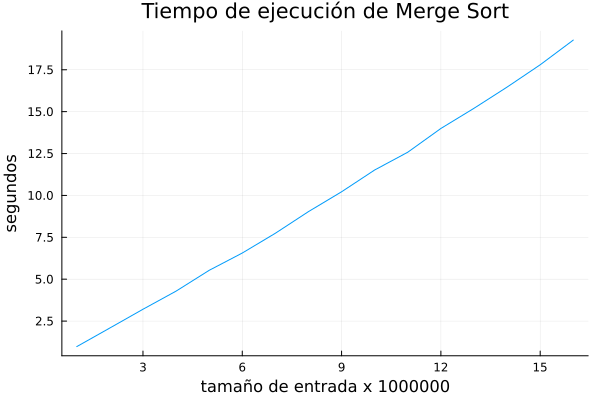

In [6]:
x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 1000000")
yaxis!("segundos")
title!("Tiempo de ejecución de Merge Sort")

De acuerdo a nuestro análisis, el tiempo de MERGE-SORT es de orden $\theta(n\lg(n))$, así que ahora ajustaremos una curva de la forma $a_0+a_1\lg(n)+a_2n+a_3n\lg(n)$ vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

In [7]:
M = zeros(4, 4)
M[1, 1] = 16
M[1, 2] = sum(log2.(x))
M[1, 3] = sum(x)
M[1, 4] = sum(x .* log2.(x))
M[2, 1] = sum(log2.(x))
M[2, 2] = sum(log2.(x) .^ 2)
M[2, 3] = sum(x .* log2.(x))
M[2, 4] = sum(x .* (log2.(x) .^ 2) )
M[3, 1] = sum(x)
M[3, 2] = sum(x .* log2.(x))
M[3, 3] = sum(x .^ 2)
M[3, 4] = sum((x .^ 2) .* log2.(x))
M[4, 1] = sum(x .* log2.(x))
M[4, 2] = sum(x .* (log2.(x) .^ 2) )
M[4, 3] = sum((x .^ 2) .* log2.(x))
M[4, 4] = sum((x .^ 2) .* (log2.(x) .^ 2))
S=M^(-1)*[sum(y), sum(y .* log2.(x)), sum(y .* x),sum((y .* x) .* log2.(x))];

In [8]:
P(x) = S[1] + S[2]*log2(x) + S[3]*x + S[4]*x*log2(x)

P (generic function with 1 method)

In [9]:
S

4-element Vector{Float64}:
 0.54067534474522
 0.4025806310405857
 0.42381685275258135
 0.16000671534005392

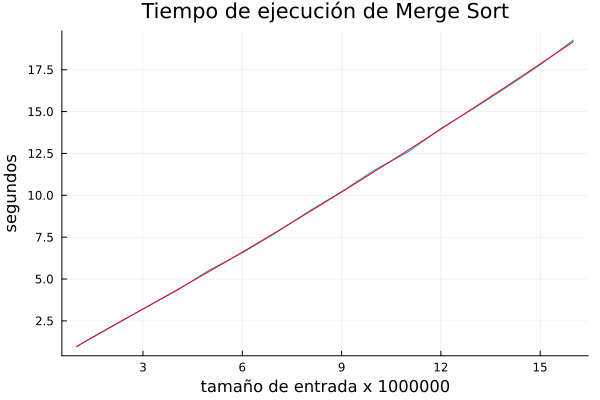

In [10]:
w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 6. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.